<a href="https://colab.research.google.com/github/VishnuBhaarath/Restaurant_modelling/blob/main/guest_journey_transactions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy
import pandas
import operator
from matplotlib import pyplot
from numpy.random import seed
from numpy.random import randn
from scipy.stats import ttest_ind
import seaborn
from numpy import mean
from numpy import std
import xlwt
import os
from xlwt import Workbook
seaborn.set(style="ticks")
wb = Workbook()

In [6]:
cd /content/drive/MyDrive/Freelancing/guest_journey_transaction

/content/drive/MyDrive/Freelancing/guest_journey_transaction


In [7]:
df=pd.read_excel('/content/drive/MyDrive/Freelancing/guest journey with trans data 1_4_22.xlsx')
df.head()

,cust_att6_ml.customer_id,guest_journey5.new_tag4,cust_att6_ml.grp,cust_att6_ml.date_dif_min_max,cust_att6_ml.date_dif_min_max_5,cust_att6_ml.pay_type,cust_att6_ml.avg_itm_disc,cust_att6_ml.avg_check_disc,cust_att6_ml.avg_amt_disc,cust_att6_ml.avg_check_in_disc,cust_att6_ml.avg_pct_disc,cust_att6_ml.source_name,cust_att6_ml.tot_order_total1,cust_att6_ml.tot_order_total2,cust_att6_ml.tot_order_total3,cust_att6_ml.tot_order_total4,cust_att6_ml.tot_order_total5,cust_att6_ml.tot_order_total1_3,cust_att6_ml.tot_order_total1_4,cust_att6_ml.tot_order_total1_5,cust_att6_ml.tot_order_total2_5,cust_att6_ml.tot_order_total3_5,cust_att6_ml.cnt_order_total1,cust_att6_ml.cnt_order_total2,cust_att6_ml.cnt_order_total3,cust_att6_ml.cnt_order_total4,cust_att6_ml.cnt_order_total5,cust_att6_ml.cnt_order_total1_3,cust_att6_ml.cnt_order_total1_4,cust_att6_ml.cnt_order_total1_5,cust_att6_ml.cnt_order_total2_5,cust_att6_ml.cnt_order_total3_5,cust_att6_ml.avg_order_total1,cust_att6_ml.avg_order_total2,cust_att6_ml.avg_order_total3,cust_att6_ml.avg_order_total4,cust_att6_ml.avg_order_total5,cust_att6_ml.avg_order_total1_3,cust_att6_ml.avg_order_total1_4,cust_att6_ml.avg_order_total1_5,...,cust_att6_ml.stdev_attrited_flag1_m_t,cust_att6_ml.stdev_attrited_flag2_m_t,cust_att6_ml.stdev_attrited_flag3_m_t,cust_att6_ml.stdev_attrited_flag4_m_t,cust_att6_ml.stdev_attrited_flag5_m_t,cust_att6_ml.stdev_attrited_flag1_3_m_t,cust_att6_ml.stdev_attrited_flag1_4_m_t,cust_att6_ml.stdev_attrited_flag1_5_m_t,cust_att6_ml.stdev_attrited_flag2_5_m_t,cust_att6_ml.stdev_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag1_f_s,cust_att6_ml.tot_attrited_flag2_f_s,cust_att6_ml.tot_attrited_flag3_f_s,cust_att6_ml.tot_attrited_flag4_f_s,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.tot_attrited_flag1_3_f_s,cust_att6_ml.tot_attrited_flag1_4_f_s,cust_att6_ml.tot_attrited_flag1_5_f_s,cust_att6_ml.tot_attrited_flag2_5_f_s,cust_att6_ml.tot_attrited_flag3_5_f_s,cust_att6_ml.avg_attrited_flag1_f_s,cust_att6_ml.avg_attrited_flag2_f_s,cust_att6_ml.avg_attrited_flag3_f_s,cust_att6_ml.avg_attrited_flag4_f_s,cust_att6_ml.avg_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag1_3_f_s,cust_att6_ml.avg_attrited_flag1_4_f_s,cust_att6_ml.avg_attrited_flag1_5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.avg_attrited_flag3_5_f_s,cust_att6_ml.stdev_attrited_flag1_f_s,cust_att6_ml.stdev_attrited_flag2_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,cust_att6_ml.stdev_attrited_flag4_f_s,cust_att6_ml.stdev_attrited_flag5_f_s,cust_att6_ml.stdev_attrited_flag1_3_f_s,cust_att6_ml.stdev_attrited_flag1_4_f_s,cust_att6_ml.stdev_attrited_flag1_5_f_s,cust_att6_ml.stdev_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_5_f_s
0,136545573,loyalist,0,42,9,NaN,0.0,0.0,0.0,0.0,0.0,IN STORE,44000.0,123010.0,60000.0,43000.0,103000.0,188010.0,231010.0,334010.0,206000.0,146000.0,2.0,3.0,2.0,2.0,3.0,6.0,8.0,11.0,7.0,5.0,22000.00,41003.33333,30000.0,21500.0,34333.33333,31335.00000,28876.25000,30364.54545,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,162381807,regular,0,31,7,NaN,0.0,0.0,0.0,0.0,0.0,IN STORE,49230.0,NaN,55050.0,50590.0,63090.0,104280.0,154870.0,217960.0,168730.0,113680.0,1.0,0.0,1.0,1.0,1.0,2.0,3.0,4.0,3.0,2.0,49230.00,NaN,55050.0,50590.0,63090.00000,52140.00000,51623.33333,54490.00000,...,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,199557223,regular,0,33,7,NaN,0.0,0.0,0.0,0.0,0.0,IN STORE,136230.0,51830.0,NaN,38940.0,70750.0,188060.0,227000.0,297750.0,109690.0,109690.0,2.0,1.0,0.0,1.0,1.0,3.0,4.0,5.0,2.0,2.0,68115.00,51830.00000,NaN,38940.0,70750.00000,62686.66667,56750.00000,59550.00000,...,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,20349961

In [8]:
df['guest_journey5.new_tag4'].unique()

array(['loyalist', 'regular', 'whale', 'slider-loyalist',
       'Churned-regular', 'Churned-loyalist', 'slider-regular',
       'Churned-whale', 'slider-whale', 'rookie'], dtype=object)

In [9]:
df.shape

(28255, 612)

In [11]:
cols=['cust_att6_ml.date_dif_min_max', 'cust_att6_ml.cnt_order_total5',
       'cust_att6_ml.avg_order_total3_5_f_s',
       'cust_att6_ml.stdev_order_total1_5_f_s',
       'cust_att6_ml.tot_no_of_items1_3_m_t',
       'cust_att6_ml.tot_no_of_items4_f_s', 'cust_att6_ml.stdev_item_total5',
       'cust_att6_ml.stdev_item_total5_m_t', 'cust_att6_ml.tot_points_earned5',
       'cust_att6_ml.tot_points_earned1_f_s',
       'cust_att6_ml.tot_days_difference4_f_s',
       'cust_att6_ml.tot_days_difference1_3_f_s',
       'cust_att6_ml.tot_days_difference1_4_f_s',
       'cust_att6_ml.tot_days_difference2_5_f_s',
       'cust_att6_ml.avg_days_difference1_3_f_s',
       'cust_att6_ml.avg_days_difference1_4_f_s',
       'cust_att6_ml.stdev_days_difference5_f_s',
       'cust_att6_ml.tot_attrited_flag5', 'cust_att6_ml.avg_attrited_flag5',
       'cust_att6_ml.avg_attrited_flag2_5',
       'cust_att6_ml.avg_attrited_flag3_5',
       'cust_att6_ml.tot_attrited_flag3_5_m_t',
       'cust_att6_ml.tot_attrited_flag5_f_s',
       'cust_att6_ml.avg_attrited_flag2_5_f_s',
       'cust_att6_ml.stdev_attrited_flag3_f_s',
      'guest_journey5.new_tag4']


In [12]:
columns=['cust_att6_ml.date_dif_min_max', 'cust_att6_ml.cnt_order_total5',
       'cust_att6_ml.avg_order_total3_5_f_s',
       'cust_att6_ml.stdev_order_total1_5_f_s',
       'cust_att6_ml.tot_no_of_items1_3_m_t',
       'cust_att6_ml.tot_no_of_items4_f_s', 'cust_att6_ml.stdev_item_total5',
       'cust_att6_ml.stdev_item_total5_m_t', 'cust_att6_ml.tot_points_earned5',
       'cust_att6_ml.tot_points_earned1_f_s',
       'cust_att6_ml.tot_days_difference4_f_s',
       'cust_att6_ml.tot_days_difference1_3_f_s',
       'cust_att6_ml.tot_days_difference1_4_f_s',
       'cust_att6_ml.tot_days_difference2_5_f_s',
       'cust_att6_ml.avg_days_difference1_3_f_s',
       'cust_att6_ml.avg_days_difference1_4_f_s',
       'cust_att6_ml.stdev_days_difference5_f_s',
       'cust_att6_ml.tot_attrited_flag5', 'cust_att6_ml.avg_attrited_flag5',
       'cust_att6_ml.avg_attrited_flag2_5',
       'cust_att6_ml.avg_attrited_flag3_5',
       'cust_att6_ml.tot_attrited_flag3_5_m_t',
       'cust_att6_ml.tot_attrited_flag5_f_s',
       'cust_att6_ml.avg_attrited_flag2_5_f_s',
       'cust_att6_ml.stdev_attrited_flag3_f_s',
      ]

In [13]:
df2=df[cols]

In [14]:
df2=df2.interpolate(method ='linear', limit_direction ='forward')
df2=df2.dropna()
df2.shape

(28237, 26)

regular to loyalist

In [15]:
df1=df2[(df2['guest_journey5.new_tag4']=='loyalist') | (df2['guest_journey5.new_tag4']=='regular')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
20,756,21.0,71537.64706,25345.842810,79.0,45.000000,18619.479360,21355.976680,903.0,242.00,53.000000,277.0,330.0,194.0,10.653846,9.705882,3.399346,0.0,0.0,0.019231,0.000,0.0,0.0,0.000000,0.000000,loyalist
22,42,1.0,14587.50000,11308.994450,48.0,17.666667,0.000000,0.000000,34.0,33.00,26.333333,18.0,18.0,18.0,9.000000,9.000000,5.250000,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.000000,regular
24,229,5.0,16736.66667,1984.613033,17.0,5.000000,2157.522653,2157.522653,0.0,43.00,29.000000,55.0,84.0,84.0,18.333333,14.000000,3.223728,1.0,0.2,0.181818,0.125,1.0,0.0,0.166667,0.471405,loyalist
25,157,5.0,12357.50000,2698.686280,12.0,4.000000,1414.213562,0.000000,55.0,74.00,41.000000,45.0,45.0,23.0,6.428571,6.428571,2.947457,0.0,0.0,0.058824,0.000,0.0,0.0,0.000000,0.412479,loyalist
29,226,1.0,55840.00000,880.000000,6.0,9.000000,0.000000,0.000000,0.0,27.75,88.400000,50.0,50.0,45.0,50.000000,50.000000,0.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.176777,regular


In [16]:
df1.shape

(11086, 26)

In [17]:
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
new_dataframe.shape

(11086, 26)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


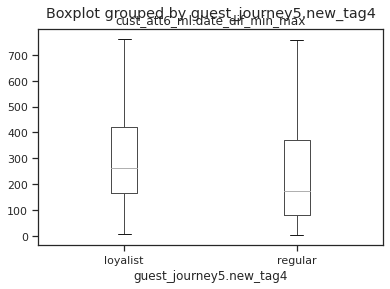

In [18]:
new_dataframe.boxplot(by ='guest_journey5.new_tag4', column =['cust_att6_ml.date_dif_min_max'], grid = False)

In [19]:
regular_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='regular']
loyalist_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='loyalist']
print(regular_df.shape)
print(loyalist_df.shape)

(5353, 26)
(5733, 26)


In [20]:
d={}
for col in columns:
  data1=regular_df[col]
  data2=loyalist_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)

In [21]:
sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))

In [22]:
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])

cust_att6_ml.avg_days_difference1_4_f_s 2.159224220033297
cust_att6_ml.avg_attrited_flag2_5_f_s 1.945100657401381
cust_att6_ml.avg_days_difference1_3_f_s 1.9366145793630438
cust_att6_ml.avg_attrited_flag2_5 1.6785638879229512
cust_att6_ml.avg_attrited_flag3_5 1.4535773996028938
cust_att6_ml.stdev_days_difference5_f_s 1.423435728075862
cust_att6_ml.avg_order_total3_5_f_s 1.2964751647720922
cust_att6_ml.tot_days_difference4_f_s 1.251245198224403
cust_att6_ml.tot_days_difference2_5_f_s 1.1877478501584662
cust_att6_ml.avg_attrited_flag5 1.1317655034062895
cust_att6_ml.tot_attrited_flag5_f_s 1.0998410660347782
cust_att6_ml.tot_days_difference1_4_f_s 0.9326984019774156
cust_att6_ml.tot_days_difference1_3_f_s 0.9171817210107313
cust_att6_ml.stdev_order_total1_5_f_s 0.8397264978501239
cust_att6_ml.date_dif_min_max 0.7675675907605104
cust_att6_ml.stdev_item_total5_m_t 0.7332945237443179
cust_att6_ml.stdev_item_total5 0.7309986046143995
cust_att6_ml.tot_no_of_items4_f_s 0.6268825447910344
cust_a

In [ ]:
wb = Workbook()
  
# add_sheet is used to create sheet.
sheet1 = wb.add_sheet('Sheet 1')
  
sheet1.write(1, 0, 'ISBT DEHRADUN')
sheet1.write(2, 0, 'SHASTRADHARA')
sheet1.write(3, 0, 'CLEMEN TOWN')
sheet1.write(4, 0, 'RAJPUR ROAD')
sheet1.write(5, 0, 'CLOCK TOWER')
sheet1.write(0, 1, 'ISBT DEHRADUN')
sheet1.write(0, 2, 'SHASTRADHARA')
sheet1.write(0, 3, 'CLEMEN TOWN')
sheet1.write(0, 4, 'RAJPUR ROAD')
sheet1.write(0, 5, 'CLOCK TOWER')
  
wb.save('xlwt example.xls')

In [23]:


# add_sheet is used to create sheet.
sheet1 = wb.add_sheet('regular-loyalist')
cnt=2  
for i in sorted_d:
   sheet1.write(cnt, 1, i)
   sheet1.write(cnt, 2, sorted_d[i])
   cnt+=1 



regular to slider-regular

In [24]:
df1=df2[(df2['guest_journey5.new_tag4']=='regular') | (df2['guest_journey5.new_tag4']=='slider-regular')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
22,42,1.0,14587.5,11308.99445,48.0,17.666667,0.0,0.0,34.0,33.00,26.333333,18.0,18.0,18.0,9.0,9.000000,5.250000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,regular
27,537,1.0,28922.5,190.00000,4.0,5.000000,0.0,0.0,30.0,0.00,64.800000,133.0,133.0,71.5,66.5,66.500000,5.250000,1.0,1.0,1.000000,1.000000,2.0,0.000000,0.0,0.294628,slider-regular
29,226,1.0,55840.0,880.00000,6.0,9.000000,0.0,0.0,0.0,27.75,88.400000,50.0,50.0,45.0,50.0,50.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.176777,regular
36,416,1.0,51360.0,22218.60861,7.0,6.000000,0.0,0.0,15.0,0.00,80.000000,11.0,91.0,80.0,11.0,30.333333,0.000000,0.0,0.0,0.250000,0.250000,1.0,0.333333,0.0,0.000000,regular
43,343,2.0,68330.0,7585.00000,4.0,5.000000,11635.0,11635.0,87.0,49.00,209.000000,47.0,256.0,209.0,47.0,128.000000,0.889757,0.0,0.0,0.333333,0.333333,0.0,0.000000,1.0,0.314270,regular


In [25]:
print(df1.shape)
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
print(new_dataframe.shape)

(9170, 26)
(9170, 26)


In [26]:
regular_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='regular']
slider_regular_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='slider-regular']
print(regular_df.shape)
print(slider_regular_df.shape)

(5353, 26)
(3817, 26)


In [27]:
d={}
for col in columns:
  data1=regular_df[col]
  data2=slider_regular_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])



cust_att6_ml.cnt_order_total5 3.2501459509230246
cust_att6_ml.tot_no_of_items4_f_s 1.6162819294937283
cust_att6_ml.tot_points_earned1_f_s 1.4436594034727992
cust_att6_ml.stdev_days_difference5_f_s 1.3427872921863024
cust_att6_ml.tot_points_earned5 1.2646692848132572
cust_att6_ml.avg_days_difference1_3_f_s 1.2645614957236777
cust_att6_ml.avg_days_difference1_4_f_s 1.2172564259096097
cust_att6_ml.stdev_attrited_flag3_f_s 1.2082090781590826
cust_att6_ml.avg_order_total3_5_f_s 1.1844509340973817
cust_att6_ml.tot_days_difference1_4_f_s 1.0784760908073485
cust_att6_ml.tot_days_difference2_5_f_s 1.0561459933726458
cust_att6_ml.tot_days_difference4_f_s 0.9077317466068251
cust_att6_ml.date_dif_min_max 0.6409568515867736
cust_att6_ml.stdev_item_total5 0.5929982759104225
cust_att6_ml.stdev_order_total1_5_f_s 0.5580678172385497
cust_att6_ml.stdev_item_total5_m_t 0.5115588641705728
cust_att6_ml.tot_attrited_flag3_5_m_t 0.44191300932732575
cust_att6_ml.tot_attrited_flag5 0.3396015785697627
cust_att6

In [28]:
sheet2 = wb.add_sheet('regular-slider-regular')
cnt=2  
for i in sorted_d:
   sheet2.write(cnt, 1, i)
   sheet2.write(cnt, 2, sorted_d[i])
   cnt+=1 

regular-churnedregular

In [29]:
df1=df2[(df2['guest_journey5.new_tag4']=='regular') | (df2['guest_journey5.new_tag4']=='Churned-regular')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
21,14,2.0,14180.0,7667.956703,63.5,31.333333,5500.0,10677.988340,25.0,22.0,39.666667,0.0,0.0,14.0,0.000000,0.000000,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Churned-regular
22,42,1.0,14587.5,11308.994450,48.0,17.666667,0.0,0.000000,34.0,33.0,26.333333,18.0,18.0,18.0,9.000000,9.000000,5.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,regular
23,20,2.0,14995.0,9776.528014,32.5,4.000000,7580.0,1078.761326,37.0,12.0,13.000000,0.0,13.0,20.0,0.000000,4.333333,3.50,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.235702,Churned-regular
26,182,1.0,29780.0,8465.841167,2.0,3.000000,0.0,0.000000,21.0,36.0,53.000000,89.0,53.0,94.0,36.464286,53.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.353553,Churned-regular
28,188,2.0,28065.0,11697.761420,4.0,7.000000,8695.0,0.000000,49.0,37.0,76.600000,21.0,21.0,49.0,21.000000,21.000000,10.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235702,Churned-regular


In [30]:
print(df1.shape)
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
print(new_dataframe.shape)

(12480, 26)
(12480, 26)


In [31]:
regular_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='regular']
churned_regular_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='Churned-regular']
print(regular_df.shape)
print(churned_regular_df.shape)

d={}
for col in columns:
  data1=regular_df[col]
  data2=churned_regular_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)  

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])



(5353, 26)
(7127, 26)
cust_att6_ml.cnt_order_total5 1.5728700769503046
cust_att6_ml.tot_points_earned5 1.2729842062627612
cust_att6_ml.avg_days_difference1_3_f_s 1.1994108735320275
cust_att6_ml.tot_days_difference1_4_f_s 1.197523481981893
cust_att6_ml.tot_no_of_items4_f_s 1.1898419305711243
cust_att6_ml.avg_days_difference1_4_f_s 1.1838310345089476
cust_att6_ml.tot_points_earned1_f_s 1.1351971702225527
cust_att6_ml.date_dif_min_max 1.0990344317438008
cust_att6_ml.stdev_attrited_flag3_f_s 1.097592140946052
cust_att6_ml.tot_days_difference1_3_f_s 1.0845725806151527
cust_att6_ml.avg_order_total3_5_f_s 1.0428905981159666
cust_att6_ml.tot_days_difference4_f_s 1.0274513113961248
cust_att6_ml.tot_attrited_flag5_f_s 0.843062672968831
cust_att6_ml.stdev_item_total5 0.8346716367180624
cust_att6_ml.stdev_days_difference5_f_s 0.8183843052989768
cust_att6_ml.stdev_order_total1_5_f_s 0.7380836290990153
cust_att6_ml.stdev_item_total5_m_t 0.7223232558743845
cust_att6_ml.tot_attrited_flag3_5_m_t 0.6820

In [32]:
sheet3 = wb.add_sheet('regular-churned-regular')
cnt=2  
for i in sorted_d:
   sheet3.write(cnt, 1, i)
   sheet3.write(cnt, 2, sorted_d[i])
   cnt+=1 

Slider-regular to churned-regular

In [33]:
df1=df2[(df2['guest_journey5.new_tag4']=='slider-regular') | (df2['guest_journey5.new_tag4']=='Churned-regular')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
21,14,2.0,14180.0,7667.956703,63.5,31.333333,5500.0,10677.988340,25.0,22.0,39.666667,0.0,0.0,14.0,0.000000,0.000000,7.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,Churned-regular
23,20,2.0,14995.0,9776.528014,32.5,4.000000,7580.0,1078.761326,37.0,12.0,13.000000,0.0,13.0,20.0,0.000000,4.333333,3.50,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.235702,Churned-regular
26,182,1.0,29780.0,8465.841167,2.0,3.000000,0.0,0.000000,21.0,36.0,53.000000,89.0,53.0,94.0,36.464286,53.000000,0.00,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.353553,Churned-regular
27,537,1.0,28922.5,190.000000,4.0,5.000000,0.0,0.000000,30.0,0.0,64.800000,133.0,133.0,71.5,66.500000,66.500000,5.25,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.294628,slider-regular
28,188,2.0,28065.0,11697.761420,4.0,7.000000,8695.0,0.000000,49.0,37.0,76.600000,21.0,21.0,49.0,21.000000,21.000000,10.50,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.235702,Churned-regular


In [34]:
print(df1.shape)
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
print(new_dataframe.shape)

(10944, 26)
(10944, 26)


In [35]:
slider_regular_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='slider-regular']
churned_regular_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='Churned-regular']
print(slider_regular_df.shape)
print(churned_regular_df.shape)

d={}
for col in columns:
  data1=regular_df[col]
  data2=churned_regular_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)
  else:
     print(col)   

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])

(3817, 26)
(7127, 26)
cust_att6_ml.tot_no_of_items1_3_m_t
cust_att6_ml.tot_days_difference2_5_f_s
cust_att6_ml.avg_attrited_flag2_5_f_s
cust_att6_ml.cnt_order_total5 1.5728700769503046
cust_att6_ml.tot_points_earned5 1.2729842062627612
cust_att6_ml.avg_days_difference1_3_f_s 1.1994108735320275
cust_att6_ml.tot_days_difference1_4_f_s 1.197523481981893
cust_att6_ml.tot_no_of_items4_f_s 1.1898419305711243
cust_att6_ml.avg_days_difference1_4_f_s 1.1838310345089476
cust_att6_ml.tot_points_earned1_f_s 1.1351971702225527
cust_att6_ml.date_dif_min_max 1.0990344317438008
cust_att6_ml.stdev_attrited_flag3_f_s 1.097592140946052
cust_att6_ml.tot_days_difference1_3_f_s 1.0845725806151527
cust_att6_ml.avg_order_total3_5_f_s 1.0428905981159666
cust_att6_ml.tot_days_difference4_f_s 1.0274513113961248
cust_att6_ml.tot_attrited_flag5_f_s 0.843062672968831
cust_att6_ml.stdev_item_total5 0.8346716367180624
cust_att6_ml.stdev_days_difference5_f_s 0.8183843052989768
cust_att6_ml.stdev_order_total1_5_f_s 0.7

In [36]:
sheet4 = wb.add_sheet('slider-regular-churned-regular')
cnt=2  
for i in sorted_d:
   sheet4.write(cnt, 1, i)
   sheet4.write(cnt, 2, sorted_d[i])
   cnt+=1 

loyalist-whale

In [37]:
df1=df2[(df2['guest_journey5.new_tag4']=='loyalist') | (df2['guest_journey5.new_tag4']=='whale')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
19,447,1.0,297335.00000,17852.010780,51.0,15.0,0.000000,19938.169790,266.0,225.00,273.0,179.0,273.0,363.0,18.826923,273.000000,0.000000,0.0,0.0,0.333333,0.333333,0.0,0.0,0.500000,0.000000,whale
20,756,21.0,71537.64706,25345.842810,79.0,45.0,18619.479360,21355.976680,903.0,242.00,53.0,277.0,330.0,194.0,10.653846,9.705882,3.399346,0.0,0.0,0.019231,0.000000,0.0,0.0,0.000000,0.000000,loyalist
24,229,5.0,16736.66667,1984.613033,17.0,5.0,2157.522653,2157.522653,0.0,43.00,29.0,55.0,84.0,84.0,18.333333,14.000000,3.223728,1.0,0.2,0.181818,0.125000,1.0,0.0,0.166667,0.471405,loyalist
25,157,5.0,12357.50000,2698.686280,12.0,4.0,1414.213562,0.000000,55.0,74.00,41.0,45.0,45.0,23.0,6.428571,6.428571,2.947457,0.0,0.0,0.058824,0.000000,0.0,0.0,0.000000,0.412479,loyalist
31,495,7.0,30416.00000,10991.375470,19.0,13.0,8705.951518,8696.549661,145.0,9.25,112.0,32.0,144.0,148.0,16.000000,28.800000,17.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.058926,loyalist


In [38]:
print(df1.shape)
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
print(new_dataframe.shape)

(5916, 26)
(5916, 26)


In [39]:
loyalist_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='loyalist']
whale_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='whale']
print(loyalist_df.shape)
print(whale_df.shape)

d={}
for col in columns:
  data1=loyalist_df[col]
  data2=whale_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)
  

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])

(5733, 26)
(183, 26)
cust_att6_ml.cnt_order_total5 1.9291985490097523
cust_att6_ml.tot_attrited_flag5 1.6396476539333682
cust_att6_ml.tot_attrited_flag3_5_m_t 1.5232203161832083
cust_att6_ml.date_dif_min_max 1.113050558123837
cust_att6_ml.tot_days_difference4_f_s 0.8657681122255394
cust_att6_ml.tot_days_difference2_5_f_s 0.8124115355290322
cust_att6_ml.tot_no_of_items4_f_s 0.7518870111130458
cust_att6_ml.avg_attrited_flag3_5 0.7368405814705713
cust_att6_ml.stdev_days_difference5_f_s 0.6701857959905223
cust_att6_ml.avg_attrited_flag2_5_f_s 0.6285869051877542
cust_att6_ml.tot_points_earned5 0.6182702301023294
cust_att6_ml.avg_attrited_flag2_5 0.6006208671375453
cust_att6_ml.avg_days_difference1_3_f_s 0.5351164081555193
cust_att6_ml.avg_days_difference1_4_f_s 0.5323013732848755
cust_att6_ml.avg_order_total3_5_f_s 0.28759841956536686
cust_att6_ml.stdev_order_total1_5_f_s 0.25544734129817287
cust_att6_ml.stdev_item_total5_m_t 0.24101767736572927
cust_att6_ml.stdev_item_total5 0.235933896453

In [40]:
sheet5 = wb.add_sheet('loyalist-whale')
cnt=2  
for i in sorted_d:
   sheet5.write(cnt, 1, i)
   sheet5.write(cnt, 2, sorted_d[i])
   cnt+=1 

loyalist-slider-loyalist

In [41]:
df1=df2[(df2['guest_journey5.new_tag4']=='loyalist') | (df2['guest_journey5.new_tag4']=='slider-loyalist')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
20,756,21.0,71537.64706,25345.842810,79.0,45.000000,18619.479360,21355.976680,903.0,242.00,53.000000,277.0,330.0,194.0,10.653846,9.705882,3.399346,0.0,0.0,0.019231,0.000,0.0,0.000000,0.000000,0.000000,loyalist
24,229,5.0,16736.66667,1984.613033,17.0,5.000000,2157.522653,2157.522653,0.0,43.00,29.000000,55.0,84.0,84.0,18.333333,14.000000,3.223728,1.0,0.2,0.181818,0.125,1.0,0.000000,0.166667,0.471405,loyalist
25,157,5.0,12357.50000,2698.686280,12.0,4.000000,1414.213562,0.000000,55.0,74.00,41.000000,45.0,45.0,23.0,6.428571,6.428571,2.947457,0.0,0.0,0.058824,0.000,0.0,0.000000,0.000000,0.412479,loyalist
31,495,7.0,30416.00000,10991.375470,19.0,13.000000,8705.951518,8696.549661,145.0,9.25,112.000000,32.0,144.0,148.0,16.000000,28.800000,17.000000,0.0,0.0,0.000000,0.000,0.0,0.000000,0.000000,0.058926,loyalist
35,236,1.0,30545.00000,0.000000,16.0,5.333333,0.000000,0.000000,170.0,126.50,74.333333,55.0,55.0,55.0,18.333333,18.333333,0.000000,1.0,1.0,0.250000,1.000,1.0,0.666667,0.000000,0.000000,slider-loyalist


In [42]:
print(df1.shape)
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
print(new_dataframe.shape)

(8086, 26)
(8086, 26)


In [43]:
loyalist_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='loyalist']
slider_loyalist_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='slider-loyalist']
print(loyalist_df.shape)
print(slider_loyalist_df.shape)

d={}
for col in columns:
  data1=loyalist_df[col]
  data2=slider_loyalist_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)
  

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])

(5733, 26)
(2353, 26)
cust_att6_ml.cnt_order_total5 7.734961865433491
cust_att6_ml.tot_points_earned5 3.3218068962496545
cust_att6_ml.tot_no_of_items1_3_m_t 2.140752441989051
cust_att6_ml.tot_no_of_items4_f_s 1.9903181998653314
cust_att6_ml.tot_points_earned1_f_s 1.5665520958036745
cust_att6_ml.stdev_attrited_flag3_f_s 1.3616126687448216
cust_att6_ml.tot_days_difference1_4_f_s 1.0831081771284843
cust_att6_ml.avg_order_total3_5_f_s 1.053495636869383
cust_att6_ml.avg_days_difference1_3_f_s 0.9380311429799605
cust_att6_ml.date_dif_min_max 0.9172913795459856
cust_att6_ml.tot_attrited_flag3_5_m_t 0.8411112792260483
cust_att6_ml.tot_days_difference4_f_s 0.7718640461994957
cust_att6_ml.stdev_item_total5 0.7634777062375041
cust_att6_ml.avg_days_difference1_4_f_s 0.758094771567698
cust_att6_ml.tot_attrited_flag5_f_s 0.7360749825858267
cust_att6_ml.stdev_item_total5_m_t 0.6925859222956806
cust_att6_ml.stdev_order_total1_5_f_s 0.6770786261130308
cust_att6_ml.avg_attrited_flag2_5_f_s 0.63065949583

In [44]:
sheet6 = wb.add_sheet('loyalist-slider-loyalist')
cnt=2  
for i in sorted_d:
   sheet6.write(cnt, 1, i)
   sheet6.write(cnt, 2, sorted_d[i])
   cnt+=1 

loyalist-churned-loyalist

In [45]:
df1=df2[(df2['guest_journey5.new_tag4']=='loyalist') | (df2['guest_journey5.new_tag4']=='Churned-loyalist')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
18,270,1.0,66156.66667,16078.603540,23.0,11.0,0.000000,18520.362900,67.0,140.00,39.0,81.0,120.0,61.0,27.000000,24.000000,0.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.000000,Churned-loyalist
20,756,21.0,71537.64706,25345.842810,79.0,45.0,18619.479360,21355.976680,903.0,242.00,53.0,277.0,330.0,194.0,10.653846,9.705882,3.399346,0.0,0.0,0.019231,0.000,0.0,0.0,0.000000,0.000000,loyalist
24,229,5.0,16736.66667,1984.613033,17.0,5.0,2157.522653,2157.522653,0.0,43.00,29.0,55.0,84.0,84.0,18.333333,14.000000,3.223728,1.0,0.2,0.181818,0.125,1.0,0.0,0.166667,0.471405,loyalist
25,157,5.0,12357.50000,2698.686280,12.0,4.0,1414.213562,0.000000,55.0,74.00,41.0,45.0,45.0,23.0,6.428571,6.428571,2.947457,0.0,0.0,0.058824,0.000,0.0,0.0,0.000000,0.412479,loyalist
31,495,7.0,30416.00000,10991.375470,19.0,13.0,8705.951518,8696.549661,145.0,9.25,112.0,32.0,144.0,148.0,16.000000,28.800000,17.000000,0.0,0.0,0.000000,0.000,0.0,0.0,0.000000,0.058926,loyalist


In [46]:
print(df1.shape)
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
print(new_dataframe.shape)

(8324, 26)
(8324, 26)


In [47]:
loyalist_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='loyalist']
churned_loyalist_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='Churned-loyalist']
print(loyalist_df.shape)
print(churned_loyalist_df.shape)

d={}
for col in columns:
  data1=loyalist_df[col]
  data2=churned_loyalist_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)
  

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])

(5733, 26)
(2591, 26)
cust_att6_ml.cnt_order_total5 2.777295497466062
cust_att6_ml.tot_points_earned5 2.3669488812869233
cust_att6_ml.tot_no_of_items1_3_m_t 2.0330385054828572
cust_att6_ml.tot_no_of_items4_f_s 1.6824459839785066
cust_att6_ml.tot_days_difference1_4_f_s 1.442921080917406
cust_att6_ml.date_dif_min_max 1.3732961084734268
cust_att6_ml.tot_days_difference1_3_f_s 1.3120858294979365
cust_att6_ml.stdev_attrited_flag3_f_s 1.2648807556294022
cust_att6_ml.tot_points_earned1_f_s 1.2516587182061634
cust_att6_ml.tot_attrited_flag3_5_m_t 1.1547989487525285
cust_att6_ml.tot_days_difference4_f_s 1.0552504791399802
cust_att6_ml.avg_order_total3_5_f_s 0.9603231381411635
cust_att6_ml.tot_attrited_flag5 0.8828506698884524
cust_att6_ml.stdev_order_total1_5_f_s 0.8668159212006947
cust_att6_ml.stdev_days_difference5_f_s 0.6847187657479985
cust_att6_ml.avg_attrited_flag2_5_f_s 0.6355386185044057
cust_att6_ml.tot_attrited_flag5_f_s 0.5842022095679087
cust_att6_ml.avg_attrited_flag2_5 0.467853915

In [48]:
sheet7 = wb.add_sheet('loyalist-churned-loyalist')
cnt=2  
for i in sorted_d:
   sheet7.write(cnt, 1, i)
   sheet7.write(cnt, 2, sorted_d[i])
   cnt+=1 

whale-slider-whale

In [49]:
df1=df2[(df2['guest_journey5.new_tag4']=='whale') | (df2['guest_journey5.new_tag4']=='slider-whale')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
19,447,1.0,297335.000000,17852.010780,51.0,15.000000,0.0,19938.16979,266.0,225.0,273.000000,179.0,273.0,363.000000,18.826923,273.0,0.000000,0.0,0.0,0.333333,0.333333,0.0,0.0,0.500,0.000000,whale
349,506,1.0,15483.333333,0.000000,25.0,4.666667,0.0,0.00000,116.0,72.0,100.666667,41.0,41.0,34.666667,41.000000,41.0,7.333333,1.0,1.0,1.000000,1.000000,1.0,0.0,0.000,0.125000,slider-whale
360,487,1.0,115037.500000,25140.801515,29.0,2.833333,0.0,0.00000,0.0,15.0,110.000000,161.5,215.5,310.000000,161.500000,114.5,21.500000,1.0,1.0,0.333333,0.500000,1.0,0.5,0.375,0.083333,slider-whale
383,186,1.0,30137.500000,0.000000,28.0,3.714286,0.0,0.00000,0.0,20.0,302.285714,45.0,45.0,45.000000,45.000000,45.0,0.000000,1.0,1.0,0.500000,1.000000,1.0,0.0,0.000,0.000000,whale
580,139,2.0,22997.500000,0.000000,11.5,2.666667,0.0,0.00000,0.0,0.0,36.000000,0.0,0.0,72.500000,0.000000,0.0,0.000000,1.0,0.5,0.500000,0.500000,1.0,0.0,0.000,0.000000,whale


In [50]:
df1.shape

(257, 26)

In [51]:
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
new_dataframe.shape

(257, 26)

In [52]:
whale_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='whale']
slider_whale_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='slider-whale']
print(whale_df.shape)
print(slider_whale_df.shape)

d={}
for col in columns:
  data1=whale_df[col]
  data2=slider_whale_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)
  

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])

(183, 26)
(74, 26)
cust_att6_ml.stdev_item_total5 5.57106771935859
cust_att6_ml.cnt_order_total5 4.882770411661517
cust_att6_ml.stdev_item_total5_m_t 3.8073449017739933
cust_att6_ml.tot_points_earned5 3.434264838960735
cust_att6_ml.tot_no_of_items4_f_s 2.1615264661470244
cust_att6_ml.date_dif_min_max 0.835699021682755
cust_att6_ml.avg_attrited_flag2_5_f_s 0.6132179355834716
cust_att6_ml.tot_attrited_flag3_5_m_t 0.5381465757312915
cust_att6_ml.tot_attrited_flag5_f_s 0.49614685370907796
cust_att6_ml.avg_attrited_flag2_5 0.32239043864541417
cust_att6_ml.tot_attrited_flag5 0.3195670254477655
cust_att6_ml.avg_attrited_flag3_5 0.21151026917336047
cust_att6_ml.avg_attrited_flag5 0.1311787928493468


In [53]:
sheet8 = wb.add_sheet('whale-slider-whale')
cnt=2  
for i in sorted_d:
   sheet8.write(cnt, 1, i)
   sheet8.write(cnt, 2, sorted_d[i])
   cnt+=1 

whale-churned-whale

In [54]:
df1=df2[(df2['guest_journey5.new_tag4']=='whale') | (df2['guest_journey5.new_tag4']=='Churned-whale')]
df1.head()

,cust_att6_ml.date_dif_min_max,cust_att6_ml.cnt_order_total5,cust_att6_ml.avg_order_total3_5_f_s,cust_att6_ml.stdev_order_total1_5_f_s,cust_att6_ml.tot_no_of_items1_3_m_t,cust_att6_ml.tot_no_of_items4_f_s,cust_att6_ml.stdev_item_total5,cust_att6_ml.stdev_item_total5_m_t,cust_att6_ml.tot_points_earned5,cust_att6_ml.tot_points_earned1_f_s,cust_att6_ml.tot_days_difference4_f_s,cust_att6_ml.tot_days_difference1_3_f_s,cust_att6_ml.tot_days_difference1_4_f_s,cust_att6_ml.tot_days_difference2_5_f_s,cust_att6_ml.avg_days_difference1_3_f_s,cust_att6_ml.avg_days_difference1_4_f_s,cust_att6_ml.stdev_days_difference5_f_s,cust_att6_ml.tot_attrited_flag5,cust_att6_ml.avg_attrited_flag5,cust_att6_ml.avg_attrited_flag2_5,cust_att6_ml.avg_attrited_flag3_5,cust_att6_ml.tot_attrited_flag3_5_m_t,cust_att6_ml.tot_attrited_flag5_f_s,cust_att6_ml.avg_attrited_flag2_5_f_s,cust_att6_ml.stdev_attrited_flag3_f_s,guest_journey5.new_tag4
19,447,1.0,297335.000000,17852.01078,51.0,15.000000,0.0,19938.169790,266.0,225.0,273.000000,179.0,273.0,363.000000,18.826923,273.000000,0.000000,0.0,0.0,0.333333,0.333333,0.0,0.0,0.500000,0.000000,whale
48,69,1.0,128200.000000,0.00000,70.0,6.909091,0.0,811.816432,0.0,81.0,53.454545,106.5,106.5,19.000000,35.785714,35.785714,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.314270,Churned-whale
146,10,2.0,79510.000000,67320.00000,4.0,4.000000,0.0,640.000000,0.0,0.0,75.250000,0.0,0.0,10.000000,0.000000,0.000000,5.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.052378,Churned-whale
305,82,1.0,19953.888889,15531.81752,6.5,6.000000,0.0,0.000000,0.0,0.0,150.666667,30.0,30.0,113.666667,15.000000,15.000000,4.676299,0.0,0.0,0.000000,0.000000,0.0,0.0,0.333333,0.000000,Churned-whale
359,90,2.0,199995.000000,38016.82113,6.0,2.666667,33250.0,1853.285933,0.0,22.5,112.000000,27.0,27.0,63.000000,27.000000,27.000000,24.500000,0.0,0.0,0.000000,0.000000,1.0,0.0,0.000000,0.166667,Churned-whale


In [55]:
print(df1.shape)
new_dataframe=df1.interpolate(method ='linear', limit_direction ='forward')
new_dataframe=new_dataframe.dropna()
new_dataframe.shape

(313, 26)


(313, 26)

In [56]:
whale_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='whale']
churned_whale_df=new_dataframe[new_dataframe['guest_journey5.new_tag4']=='Churned-whale']
print(whale_df.shape)
print(churned_whale_df.shape)

d={}
for col in columns:
  data1=whale_df[col]
  data2=churned_whale_df[col]
  mean1=mean(data1)
  mean2=mean(data2)
  stat,p=ttest_ind(data1,data2)
  alpha=0.05
  if p<=alpha:
     d[col]=(mean1/mean2)
  

sorted_d = dict( sorted(d.items(), key=operator.itemgetter(1),reverse=True))
for i in sorted_d:
  print(i,end=' ')
  print(sorted_d[i])

(183, 26)
(130, 26)
cust_att6_ml.stdev_item_total5_m_t 3.6973484026173677
cust_att6_ml.stdev_item_total5 2.219113565926773
cust_att6_ml.date_dif_min_max 1.661984524888001
cust_att6_ml.tot_days_difference1_4_f_s 1.3819176685910057
cust_att6_ml.tot_days_difference1_3_f_s 1.2455167419142303
cust_att6_ml.avg_attrited_flag2_5_f_s 0.7128395597579184
cust_att6_ml.tot_attrited_flag5_f_s 0.6523524507667776
cust_att6_ml.avg_attrited_flag2_5 0.6250265728963171
cust_att6_ml.tot_attrited_flag5 0.6210051311726955
cust_att6_ml.avg_attrited_flag3_5 0.5180427363608776
cust_att6_ml.avg_attrited_flag5 0.33008144678556645


In [57]:
sheet9 = wb.add_sheet('whale-churned-whale')
cnt=2  
for i in sorted_d:
   sheet9.write(cnt, 1, i)
   sheet9.write(cnt, 2, sorted_d[i])
   cnt+=1 
wb.save('flow_guest_journey.xlsx')   

In [43]:
stat, p = ttest_ind(data1, data2)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=-20.806, p=0.000
Different distributions (reject H0)
